In [1]:
'''
Build a suggorate model for the data
there are 2 ML models that want to build
if there are 3 dataset, then there are 6 models after training
'''

'\nBuild a suggorate model for the data\nthere are 2 ML models that want to build\nif there are 3 dataset, then there are 6 models after training\n'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import sklearn.metrics as m
import xgboost as xgb
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#draw figure of train test split distribution
def draw_distribution(train, val, test, title):
    train_distribution_lr_predicted = train.value_counts(title)
    train_distribution_lr_predicted = train_distribution_lr_predicted.reset_index()
    train_distribution_lr_predicted["class"] = "train"

    val_distribution_lr_predicted = val.value_counts(title)
    val_distribution_lr_predicted = val_distribution_lr_predicted.reset_index()
    val_distribution_lr_predicted["class"] = "validation"

    test_distribution_lr_predicted = test.value_counts(title)
    test_distribution_lr_predicted = test_distribution_lr_predicted.reset_index()
    test_distribution_lr_predicted["class"] = "test"

    total_distribution_lr_predicted = pd.concat([train_distribution_lr_predicted, val_distribution_lr_predicted, test_distribution_lr_predicted])

    total_distribution_lr_predicted.columns = [title, "Count", "class"]
    grade_map = {
        0: "Benign",
        1: "Malicious"}
    total_distribution_lr_predicted["Label"] = total_distribution_lr_predicted[title].map(grade_map)

    ax = sns.barplot(x="class", y="Count", hue=title, data=total_distribution_lr_predicted, palette="Blues" )
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.bar_label(ax.containers[1], label_type='edge')

In [4]:
def Preprocess_GAN(train, label):
    # min max standardization
    # 創建一個MinMaxScaler對象
    # scaler = MinMaxScaler()
    scaler = StandardScaler()
    scaler = RobustScaler()
    # 選擇所有數值型列，並移除"BwdPSHFlags"
    numeric_columns = list(train.select_dtypes(include=['int', "float"]).columns)
    numeric_columns.remove("BwdPSHFlags")
    numeric_columns.remove(label)

    # 對每一個數值型列進行縮放
    for c in numeric_columns:
        train[c] = scaler.fit_transform(train[[c]])
        # print("scalar max: ", scaler.data_max_)
        # print("scalar min: ", scaler.data_min_)

    # get the true label of the train set
    true_label = train[label]

    # del train[label]
    return_train = train.drop(label, axis=1)

    return return_train, true_label

In [5]:

train_lr_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')
test_lr_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')
# change the last column name to "Label"
last_column = train_lr_predicted.columns[-1]
train_lr_predicted.rename(columns={last_column: "Label"}, inplace=True)

train_dt_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_dt_predicted_0322.csv')
test_dt_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')
last_column = train_dt_predicted.columns[-1]
train_dt_predicted.rename(columns={last_column: "Label"}, inplace=True)

train_xgb_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_xgb_predicted_0322.csv')
test_xgb_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')
last_column = train_xgb_predicted.columns[-1]
train_xgb_predicted.rename(columns={last_column: "Label"}, inplace=True)

train_dnn_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_dnn_predicted_0322.csv')
test_dnn_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')
last_column = train_dnn_predicted.columns[-1]
train_dnn_predicted.rename(columns={last_column: "Label"}, inplace=True)

# X_train_lr_predicted, y_train_lr_predicted = train_lr_predicted.drop(columns=['LR_Predicted'], axis=1), train_lr_predicted['LR_Predicted']
# y_train_lr_predicted.columns = ['Label']
# # X_val_lr_predicted, y_val_lr_predicted = val_lr_predicted.drop(columns=['LR_Predicted'], axis=1), val_lr_predicted['LR_Predicted']
# X_test_lr_predicted, y_test_lr_predicted = test_lr_predicted.drop(columns=['Label'], axis=1), test_lr_predicted['Label']

# X_train_dt_predicted, y_train_dt_predicted = train_dt_predicted.drop(columns=['DT_Predicted'], axis=1), train_dt_predicted['DT_Predicted']
# y_train_dt_predicted.columns = ['Label']
# # X_val_dt_predicted, y_val_dt_predicted = val_dt_predicted.drop(columns=['DT_Predicted'], axis=1), val_dt_predicted['DT_Predicted']
# X_test_dt_predicted, y_test_dt_predicted = test_dt_predicted.drop(columns=['Label'], axis=1), test_dt_predicted['Label']

# X_train_xgb_predicted, y_train_xgb_predicted = train_xgb_predicted.drop(columns=['XGB_Predicted'], axis=1), train_xgb_predicted['XGB_Predicted']
# y_train_xgb_predicted.columns = ['Label']
# # X_val_xgb_predicted, y_val_xgb_predicted = val_xgb_predicted.drop(columns=['XGB_Predicted'], axis=1), val_xgb_predicted['XGB_Predicted']    
# X_test_xgb_predicted, y_test_xgb_predicted = test_xgb_predicted.drop(columns=['Label'], axis=1), test_xgb_predicted['Label']

# X_train_dnn_predicted, y_train_dnn_predicted = train_dnn_predicted.drop(columns=['DNN_Predicted'], axis=1), train_dnn_predicted['DNN_Predicted']
# y_train_dnn_predicted.columns = ['Label']
# # X_val_dnn_predicted, y_val_dnn_predicted = val_dnn_predicted.drop(columns=['DNN_Predicted'], axis=1), val_dnn_predicted['DNN_Predicted']
# X_test_dnn_predicted, y_test_dnn_predicted = test_dnn_predicted.drop(columns=['Label'], axis=1), test_dnn_predicted['Label']



train_lr_predicted['Label'].value_counts()

Label
0    12571
1     4701
Name: count, dtype: int64

In [6]:
X_train_lr_predicted, y_train_lr_predicted  = Preprocess_GAN(train_lr_predicted, "Label")
# X_val_lr_predicted, y_val_lr_predicted = Preprocess_GAN(val_lr_predicted, "LR_Predicted")
X_test_lr_predicted, y_test_lr_predicted = Preprocess_GAN(test_lr_predicted, "Label")

X_train_dt_predicted, y_train_dt_predicted = Preprocess_GAN(train_dt_predicted, "Label")
# X_val_dt_predicted, y_val_dt_predicted = Preprocess_GAN(val_dt_predicted, "DT_Predicted")
X_test_dt_predicted, y_test_dt_predicted = Preprocess_GAN(test_dt_predicted, "Label")

X_train_xgb_predicted, y_train_xgb_predicted = Preprocess_GAN(train_xgb_predicted, "Label")
# X_val_xgb_predicted, y_val_xgb_predicted = Preprocess_GAN(val_xgb_predicted, "XGB_Predicted")
X_test_xgb_predicted, y_test_xgb_predicted = Preprocess_GAN(test_xgb_predicted, "Label")

X_train_dnn_predicted, y_train_dnn_predicted = Preprocess_GAN(train_dnn_predicted, "Label")
# X_val_dnn_predicted, y_val_dnn_predicted = Preprocess_GAN(val_dnn_predicted, "DNN_Predicted")
X_test_dnn_predicted, y_test_dnn_predicted = Preprocess_GAN(test_dnn_predicted, "Label")

In [7]:
#draw distribution
#logistic regression
#draw_distribution(train_lr_predicted, val_lr_predicted, test_lr_predicted, 'LR_Predicted')

#decision tree
# draw_distribution(train_dt_predicted, val_dt_predicted, test_dt_predicted, 'DT_Predicted')

#sgboost
# draw_distribution(train_xgb_predicted, val_xgb_predicted, test_xgb_predicted, 'XGB_Predicted')

## dnn
# draw_distribution(train_dnn_predicted, val_dnn_predicted, test_dnn_predicted, 'DNN_Predicted')

In [8]:
# buile model
# retuen model, y_pred
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost import XGBClassifier

def model_train(modelname, X_train_predicted, y_train_predicted, X_test_predicted, y_test_predicted, dataset_resource):

    if modelname == 'LogisticRegression':
        model = LogisticRegression()
        model.fit(X_train_predicted, y_train_predicted)
    elif modelname == 'DecisionTree':
        model = DecisionTreeClassifier()
        model.fit(X_train_predicted, y_train_predicted)
    elif modelname == 'XGBoost':
        model = xgb.XGBClassifier()
        model.fit(X_train_predicted, y_train_predicted)
        
    # print(X_train_predicted.shape, X_test_predicted.shape)    
    print(modelname)
    print("dataset_resource: ", dataset_resource)
    # Testing
    start_test = time.time()
    y_pred = model.predict(X_test_predicted)
    acc_test = accuracy_score(y_test_predicted, y_pred)
    recall_score_test = recall_score(y_test_predicted, y_pred, average='weighted')
    end_test = time.time()
    testing_time = end_test - start_test


    # Validation
    start_validation = time.time()
    y_test =  model.predict(X_test_predicted)
    val_acc = accuracy_score(y_test_predicted, y_test)
    recall_score_test = recall_score(y_test_predicted, y_test, average='weighted')
    end_validation = time.time()
    validation_time = end_validation - start_validation

    # Results
    print("Accuracy: ", acc_test)
    print("Recall: ", recall_score_test)
    print("Validation Accuracy: ", val_acc)
    print("Validation Recall: ", recall_score_test)
    print("Confusion matrix: \n", confusion_matrix(y_test_predicted, y_pred))
    print("Classification report: \n\n", classification_report(y_test_predicted, y_pred, target_names=['Benign', 'Malicious'], digits=4))
    return model, y_pred

In [9]:
# draw confusion matrix

def draw_confusion_matrix(y_test, y_pred, model, model_name, dataset_resource):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    total = np.sum(cm)
    confusion_percentage = (cm  / total) * 100

    strings = np.asarray([['%', '%'],
                        ['%', '%']])
    labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
    plt.figure(figsize=(8,5))
    sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 10})
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(f'Confusion Matrix of {model_name} Surrogate Model', fontsize=15)
    # add accuracy
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    plt.text(0.5, 2.5, f'Dataset from: {dataset_resource}', dict(size=12))
    
    plt.show()

### Logostic Regression

In [10]:

lr_model_from_lrdata, y_lrpred_from_lrdata = model_train('LogisticRegression', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, 'lr')
lr_model_from_dtdata, y_lrpred_from_dtdata = model_train('LogisticRegression', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, 'dt')
lr_model_from_xgbdata, y_lrpred_from_xgbdata = model_train('LogisticRegression', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, 'xgb')
lr_model_from_dnndata, y_lrpred_from_dnndata = model_train('LogisticRegression', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, 'dnn')



LogisticRegression
dataset_resource:  lr
Accuracy:  0.7966651227420102
Recall:  0.7966651227420102
Validation Accuracy:  0.7966651227420102
Validation Recall:  0.7966651227420102
Confusion matrix: 
 [[11427  1144]
 [ 2368  2333]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.8283    0.9090    0.8668     12571
   Malicious     0.6710    0.4963    0.5706      4701

    accuracy                         0.7967     17272
   macro avg     0.7497    0.7026    0.7187     17272
weighted avg     0.7855    0.7967    0.7862     17272

LogisticRegression
dataset_resource:  dt
Accuracy:  0.7467577582213988
Recall:  0.7467577582213988
Validation Accuracy:  0.7467577582213988
Validation Recall:  0.7467577582213988
Confusion matrix: 
 [[11143  1428]
 [ 2946  1755]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.7909    0.8864    0.8359     12571
   Malicious     0.5514    0.3733    0.4452      470

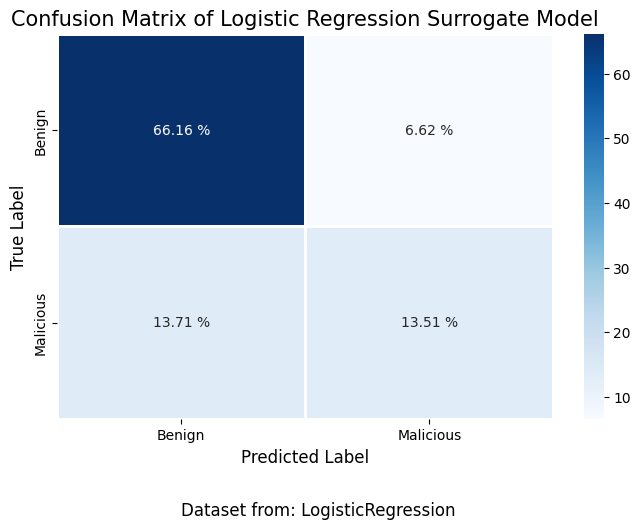

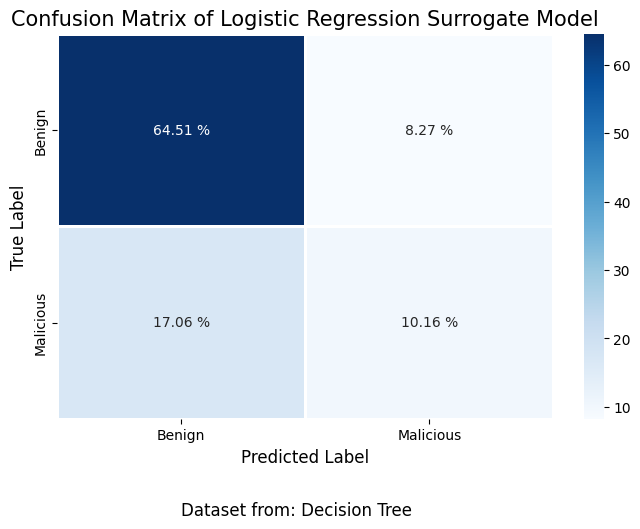

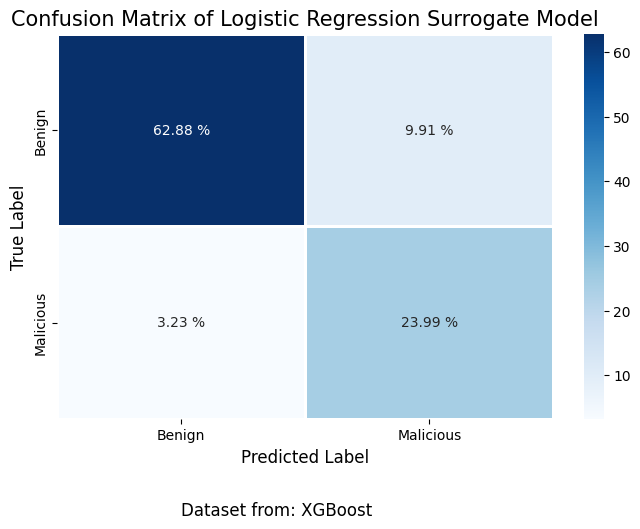

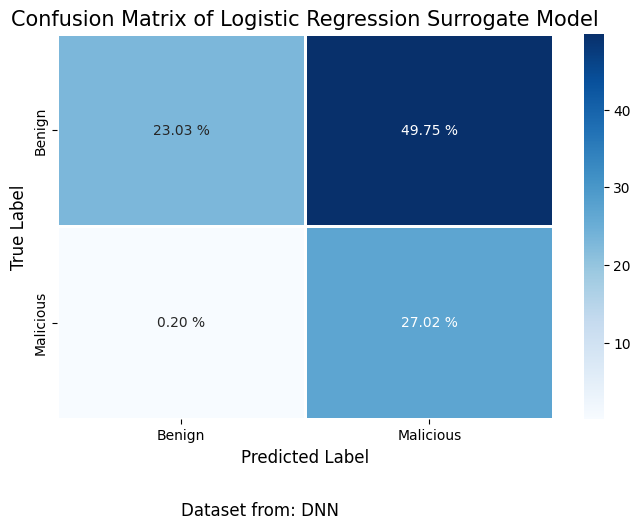

In [11]:

draw_confusion_matrix(y_test_lr_predicted, y_lrpred_from_lrdata, lr_model_from_lrdata, 'Logistic Regression', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_lrpred_from_dtdata, lr_model_from_dtdata, 'Logistic Regression', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_lrpred_from_xgbdata, lr_model_from_xgbdata, 'Logistic Regression', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_lrpred_from_dnndata, lr_model_from_dnndata, 'Logistic Regression', "DNN")

### DecisionTree

In [12]:
dt_model_from_lrdata, y_dtpred_from_lrdata = model_train('DecisionTree', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, 'lr')
dt_model_from_dtdata, y_dtpred_from_dtdata = model_train('DecisionTree', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, 'dt')
dt_model_from_xgbdata, y_dtpred_from_xgbdata = model_train('DecisionTree', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, 'xgb')
dt_model_from_dnndata, y_dtpred_from_dnndata = model_train('DecisionTree', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, 'dnn')

DecisionTree
dataset_resource:  lr
Accuracy:  1.0
Recall:  1.0
Validation Accuracy:  1.0
Validation Recall:  1.0
Confusion matrix: 
 [[12571     0]
 [    0  4701]]
Classification report: 

               precision    recall  f1-score   support

      Benign     1.0000    1.0000    1.0000     12571
   Malicious     1.0000    1.0000    1.0000      4701

    accuracy                         1.0000     17272
   macro avg     1.0000    1.0000    1.0000     17272
weighted avg     1.0000    1.0000    1.0000     17272

DecisionTree
dataset_resource:  dt
Accuracy:  0.8269453450671608
Recall:  0.8269453450671608
Validation Accuracy:  0.8269453450671608
Validation Recall:  0.8269453450671608
Confusion matrix: 
 [[12465   106]
 [ 2883  1818]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.8122    0.9916    0.8929     12571
   Malicious     0.9449    0.3867    0.5488      4701

    accuracy                         0.8269     17272
   macro avg   

In [13]:
# train decision tree
dt_model = DecisionTreeClassifier(max_depth = 3)
dt_model_from_lrdata = dt_model.fit(X_train_lr_predicted, y_train_lr_predicted)
y_dtpred_from_lrdata = dt_model_from_lrdata.predict(X_test_lr_predicted)
print("Decision Tree")
print("dataset_resource: ", 'lr')
print("Accuracy: ", accuracy_score(y_test_lr_predicted, y_dtpred_from_lrdata))
print("Recall: ", recall_score(y_test_lr_predicted, y_dtpred_from_lrdata, average='weighted'))
print("Confusion matrix: \n", confusion_matrix(y_test_lr_predicted, y_dtpred_from_lrdata))
print("Classification report: \n\n", classification_report(y_test_lr_predicted, y_dtpred_from_lrdata, target_names=['Benign', 'Malicious'], digits=4))


Decision Tree
dataset_resource:  lr
Accuracy:  0.9400764242704956
Recall:  0.9400764242704956
Confusion matrix: 
 [[11703   868]
 [  167  4534]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9859    0.9310    0.9577     12571
   Malicious     0.8393    0.9645    0.8976      4701

    accuracy                         0.9401     17272
   macro avg     0.9126    0.9477    0.9276     17272
weighted avg     0.9460    0.9401    0.9413     17272



In [28]:
dt_model = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', min_samples_split = 15, min_samples_leaf = 2, max_features = 0.7, random_state = 42)
dt_model_from_dtdata = dt_model.fit(X_train_dt_predicted, y_train_dt_predicted)
y_dtpred_from_lrdata = dt_model_from_dtdata.predict(X_test_dt_predicted)
print("Decision Tree")
print("dataset_resource: ", 'dt')
print("Accuracy: ", accuracy_score(y_test_dt_predicted, y_dtpred_from_dtdata))
print("Recall: ", recall_score(y_test_dt_predicted, y_dtpred_from_lrdata, average='weighted'))
print("Confusion matrix: \n", confusion_matrix(y_test_dt_predicted, y_dtpred_from_dtdata))
print("Classification report: \n\n", classification_report(y_test_dt_predicted, y_dtpred_from_dtdata, target_names=['Benign', 'Malicious'], digits=4))

Decision Tree
dataset_resource:  dt
Accuracy:  0.8269453450671608
Recall:  0.8062181565539601
Confusion matrix: 
 [[12465   106]
 [ 2883  1818]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.8122    0.9916    0.8929     12571
   Malicious     0.9449    0.3867    0.5488      4701

    accuracy                         0.8269     17272
   macro avg     0.8785    0.6891    0.7209     17272
weighted avg     0.8483    0.8269    0.7993     17272



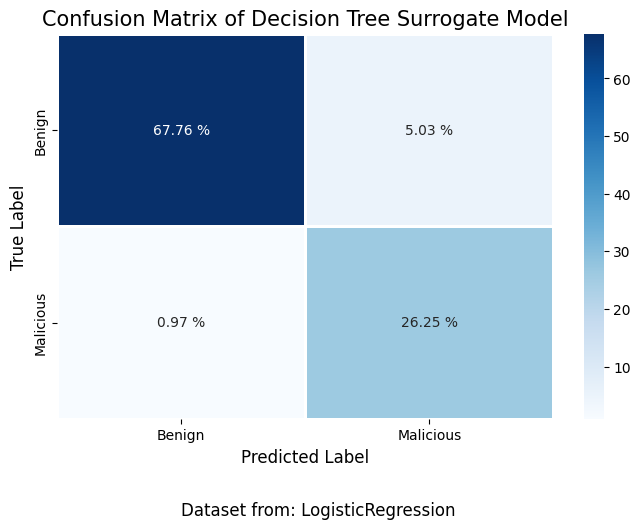

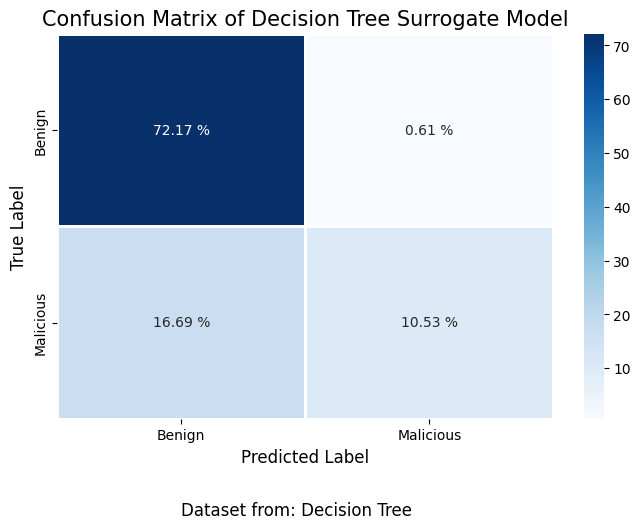

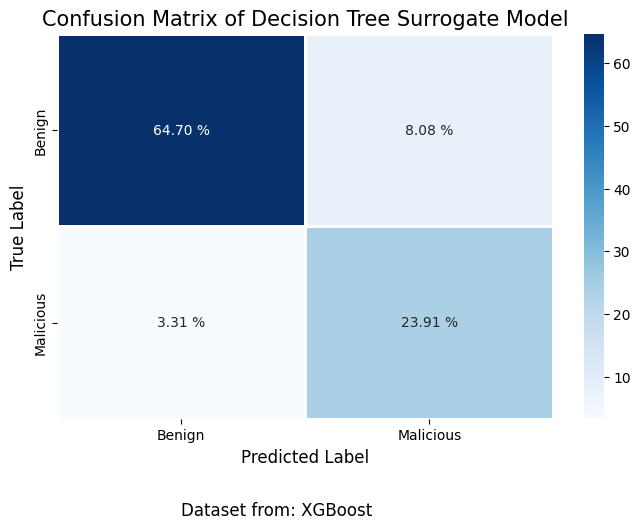

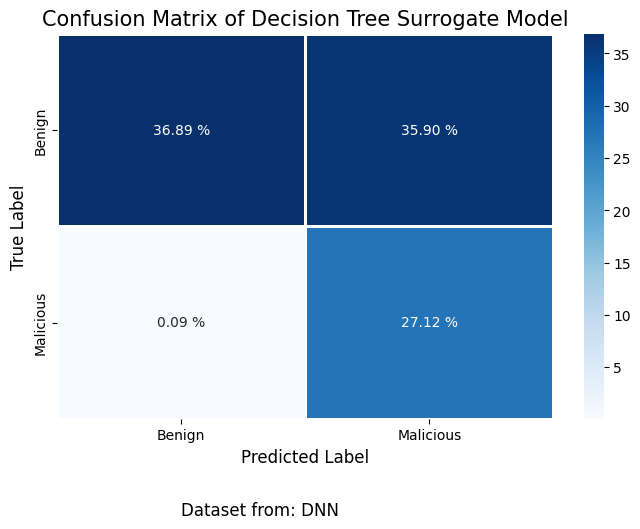

In [14]:
draw_confusion_matrix(y_test_lr_predicted, y_dtpred_from_lrdata, dt_model_from_lrdata, 'Decision Tree', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_dtpred_from_dtdata, dt_model_from_dtdata, 'Decision Tree', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_dtpred_from_xgbdata, dt_model_from_xgbdata, 'Decision Tree', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_dtpred_from_dnndata, dt_model_from_dnndata, 'Decision Tree', "DNN")

### XGBoost

In [15]:
X_train_xgb_predicted

,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMin,FwdPktLenStd,BwdPktLenMax,BwdPktLenMean,BwdPktLenStd,...,FwdHeaderLen.1,SubflowFwdPkts,SubflowFwdByts,IdleStd,SubflowBwdPkts,SubflowBwdByts,InitBwdWinByts,FwdActDataPkts,ActiveStd,ActiveMax
0,-0.003726,1.6,0.75,1.789284,0.75,0.000000,1.547776,0.458601,0.300163,0.667010,...,1.595238,1.6,1.789284,0.0,0.75,0.302668,1.478814,2.0,0.0,0.0
1,-0.015362,0.0,-0.50,-0.154124,-0.50,0.176471,0.000000,-0.072749,-0.316367,0.000000,...,-0.142857,0.0,-0.154124,0.0,-0.50,-0.064857,-0.004237,0.0,0.0,0.0
2,-0.011490,0.4,0.00,0.105960,0.00,0.882353,0.000000,0.033360,0.192907,0.000000,...,0.095238,0.4,0.105960,0.0,0.00,0.056578,-0.004237,1.0,0.0,0.0
3,-0.015503,-0.2,-0.25,-0.183022,-0.25,0.000000,0.000000,-0.072749,-0.316367,0.000000,...,-0.261905,-0.2,-0.183022,0.0,-0.25,-0.064857,1.093220,-0.5,0.0,0.0
4,-0.010276,0.0,0.00,0.009633,0.00,1.176471,0.000000,0.022106,0.138893,0.000000,...,0.000000,0.0,0.009633,0.0,0.00,0.043698,-0.004237,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40295,-0.012826,0.0,0.00,-0.043347,0.00,0.852941,0.000000,-0.036576,-0.142751,0.000000,...,-0.142857,0.0,-0.043347,0.0,0.00,-0.023459,-0.004237,0.0,0.0,0.0
40296,-0.009381,0.0,0.00,0.062613,0.00,1.500000,0.000000,0.039791,0.223772,0.000000,...,-0.142857,0.0,0.062613,0.0,0.00,0.063937,-0.004237,0.0,0.0,0.0
40297,-0.015489,0.0,0.00,0.086695,0.00,1.647059,0.000000,0.075161,0.393530,0.000000,...,0.000000,0.0,0.086695,0.0,0.00,0.104416,-0.004237,0.0,0.0,0.0
40298,-0.009461,-0.2,-0.25,-0.028898,-0.25,1.882353,0.000000,0.021302,0.135035,0.000000,...,-0.261905,-0.2,-0.028898,0.0,-0.25,-0.011040,-0.004237,-0.5,0.0,0.0


In [16]:
xgb_model_from_lrdata, y_xgbpred_from_lrdata = model_train('XGBoost', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, 'lr')
xgb_model_from_dtdata, y_xgbpred_from_dtdata = model_train('XGBoost', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, 'dt')
xgb_model_from_xgbdata, y_xgbpred_from_xgbdata = model_train('XGBoost', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, 'xgb')
xgb_model_from_dnndata, y_xgbpred_from_dnndata = model_train('XGBoost', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, 'dnn')


XGBoost
dataset_resource:  lr
Accuracy:  0.9989578508568782
Recall:  0.9989578508568782
Validation Accuracy:  0.9989578508568782
Validation Recall:  0.9989578508568782
Confusion matrix: 
 [[12563     8]
 [   10  4691]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9992    0.9994    0.9993     12571
   Malicious     0.9983    0.9979    0.9981      4701

    accuracy                         0.9990     17272
   macro avg     0.9988    0.9986    0.9987     17272
weighted avg     0.9990    0.9990    0.9990     17272

XGBoost
dataset_resource:  dt
Accuracy:  0.8028022232515053
Recall:  0.8028022232515053
Validation Accuracy:  0.8028022232515053
Validation Recall:  0.8028022232515053
Confusion matrix: 
 [[12506    65]
 [ 3341  1360]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.7892    0.9948    0.8801     12571
   Malicious     0.9544    0.2893    0.4440      4701

    accuracy       

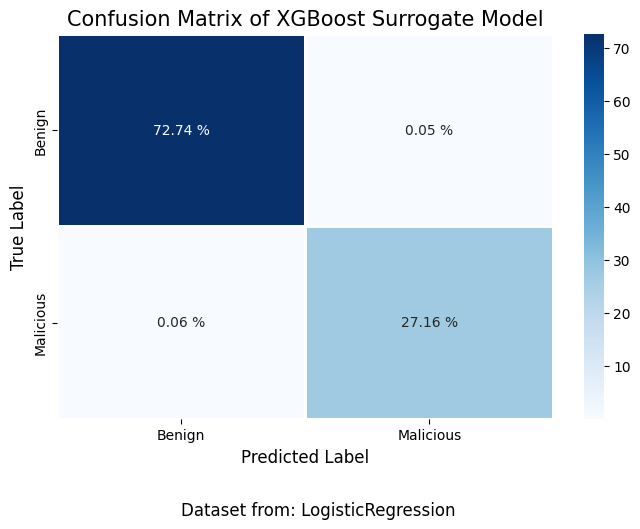

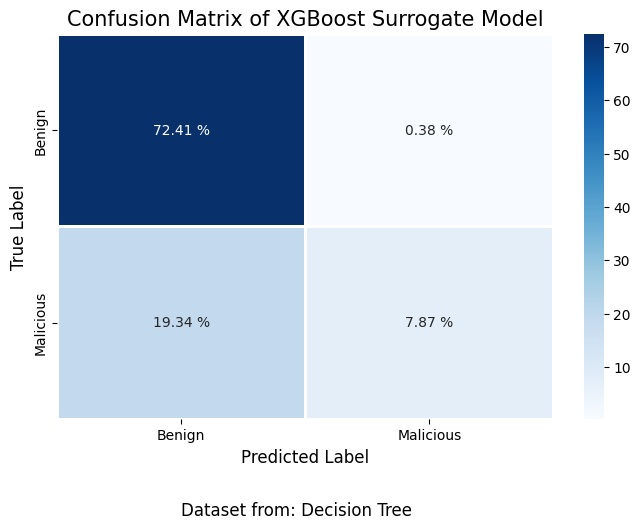

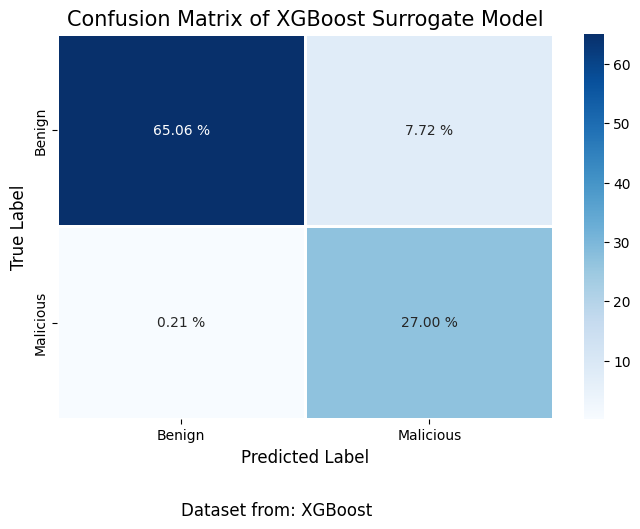

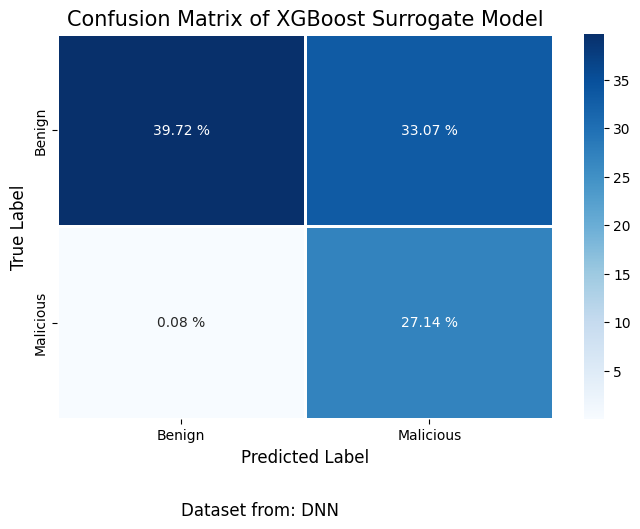

In [17]:
draw_confusion_matrix(y_test_lr_predicted, y_xgbpred_from_lrdata, xgb_model_from_lrdata, 'XGBoost', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_xgbpred_from_dtdata, xgb_model_from_dtdata, 'XGBoost', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_xgbpred_from_xgbdata, xgb_model_from_xgbdata, 'XGBoost', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_xgbpred_from_dnndata, xgb_model_from_dnndata, 'XGBoost', "DNN")

### Save Model

In [27]:
import torch
import pickle

# save model
# pickle.dump(model_dt, open("../target_model/ml_model/target_dt.pickle", "wb")) # target_model\ml_model
# pickle.dump(model_lr, open("../target_model/ml_model/target_lr.pickle", "wb"))

pickle.dump(lr_model_from_lrdata, open("../surrogate_model/ml_model/lr_model_from_lrdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(lr_model_from_dtdata, open("../surrogate_model/ml_model/lr_model_from_dtdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(lr_model_from_dnndata, open("../surrogate_model/ml_model/lr_model_from_dnndata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(lr_model_from_xgbdata, open("../surrogate_model/ml_model/lr_model_from_xgbdata.pickle", "wb")) # surrogate_model\ml_model

pickle.dump(dt_model_from_lrdata, open("../surrogate_model/ml_model/dt_model_from_lrdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(dt_model_from_dtdata, open("../surrogate_model/ml_model/dt_model_from_dtdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(dt_model_from_dnndata, open("../surrogate_model/ml_model/dt_model_from_dnndata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(dt_model_from_xgbdata, open("../surrogate_model/ml_model/dt_model_from_xgbdata.pickle", "wb")) # surrogate_model\ml_model

pickle.dump(xgb_model_from_lrdata, open("../surrogate_model/ml_model/xgb_model_from_lrdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(xgb_model_from_dtdata, open("../surrogate_model/ml_model/xgb_model_from_dtdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(xgb_model_from_dnndata, open("../surrogate_model/ml_model/xgb_model_from_dnndata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(xgb_model_from_xgbdata, open("../surrogate_model/ml_model/xgb_model_from_xgbdata.pickle", "wb")) # surrogate_model\ml_model



In [19]:
ids_model = pickle.load(open('../surrogate_model/ml_model/xgb_model_from_lrdata.pickle', 'rb'))
# ids_model = xgb_model_from_lrdata
predicted = ids_model.predict(X_test_lr_predicted)
print("classification_report: \n", classification_report(y_test_lr_predicted, predicted, target_names=['Benign', 'Malicious'], digits=4))

classification_report: 
               precision    recall  f1-score   support

      Benign     0.9992    0.9994    0.9993     12571
   Malicious     0.9983    0.9979    0.9981      4701

    accuracy                         0.9990     17272
   macro avg     0.9988    0.9986    0.9987     17272
weighted avg     0.9990    0.9990    0.9990     17272

